# Import Library

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import transform
from skimage import io
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load Image File

In [4]:
def loadTrainImages(path='data/Train'):
    classes = [ g for g in os.listdir(path) if os.path.isdir(path + '/' + g)]

    images = []
    labels = []

    for classid in classes:
        image_class_path = os.path.join(path, classid)

        image_files = sorted([os.path.join(image_class_path, file)
                 for file in os.listdir(image_class_path) if file.endswith('.png')])
        
        images.extend(image_files)
        labels.extend([ int(classid) ] * len(image_files))

    return np.array(images), np.array(labels)

In [5]:
train_image, y_train = loadTrainImages()

print('train_image shape', train_image.shape)

print('y_train shape', y_train.shape)

train_image shape (39209,)
y_train shape (39209,)


In [6]:
def loadTestImages(path='data/Test'):
    image_files = sorted([os.path.join(path, file)
             for file in os.listdir(path) if file.endswith('.png')])

    return np.array(image_files)

In [7]:
test_image = loadTestImages()

In [8]:
print('test_image shape', test_image.shape)

test_image shape (12630,)


# Resize Image & Write the data into npy file

In [9]:
def resize_image(images, width=32, height=32):
    im_ar = []

    for j in images:
        image = io.imread(j)

        im = transform.resize(image, (width, height))

        im_ar.append(im) 

    return np.asarray(im_ar)

In [10]:
# np.save('data.npy', resize_image(train_image))

In [11]:
# np.save('testing.npy', resize_image(test_image))

# Load data from numpy array

In [12]:
X_train = np.load('data.npy') # load
X_test = np.load('testing.npy') # load

In [13]:
y_test = pd.read_csv("Data/Test.csv").ClassId.values

In [14]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(39209, 32, 32, 3) (12630, 32, 32, 3)
(39209,) (12630,)


# Display Image

In [15]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)

    plt.xticks([]), plt.yticks([])
    plt.show()


# Display two images
def display(a, b, title1 = "Original", title2 = "Grayed"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# P1: Convert to Gray

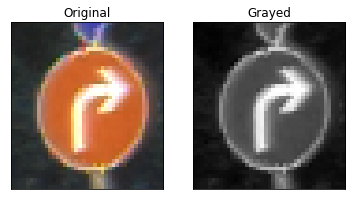

(45, 41, 3) (45, 41)


In [26]:
image = cv2.imread(train_image[2300])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

display(image, gray)
print(image.shape, gray.shape)

In [27]:
gray

array([[30, 30, 33, ..., 44, 43, 42],
       [28, 31, 33, ..., 46, 43, 41],
       [31, 34, 34, ..., 42, 43, 40],
       ...,
       [42, 43, 46, ..., 40, 38, 38],
       [42, 45, 49, ..., 45, 44, 42],
       [42, 45, 47, ..., 40, 41, 41]], dtype=uint8)

In [31]:
transform.resize(gray, (32, 32), preserve_range=True)

array([[28.96606445, 30.84375   , 33.26342773, ..., 43.34594727,
        42.50756836, 41.140625  ],
       [29.5       , 31.80541992, 32.45556641, ..., 41.16113281,
        41.72021484, 40.53125   ],
       [31.28125   , 33.421875  , 32.61572266, ..., 38.99536133,
        38.9753418 , 38.12280273],
       ...,
       [37.15625   , 38.4375    , 40.36694336, ..., 39.41259766,
        36.85522461, 36.03125   ],
       [41.58618164, 43.78979492, 46.73193359, ..., 40.44165039,
        39.984375  , 38.703125  ],
       [42.28125   , 44.92944336, 47.46655273, ..., 40.8840332 ,
        40.49194336, 40.23168945]])

In [24]:
def color2gray(images):
    im_ar=[]
    for im in images:
        image = cv2.imread(im)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        im = transform.resize(gray, (32, 32))
        im_ar.append(im)
    return np.asarray(im_ar)

In [18]:
X_gray_train = color2gray(train_image)
# np.save('data_gray.npy', X_gray_train)

In [19]:
X_gray_test = color2gray(test_image)
# np.save('data_gray.npy', X_gray_train)

In [20]:
print(X_gray_train.shape, X_gray_test.shape)
print(y_train.shape, y_test.shape)

(39209, 32, 32) (12630, 32, 32)
(39209,) (12630,)


In [1]:
X_gray_train[0]

NameError: name 'X_gray_train' is not defined

# Remove noise

In [54]:
def blur(image):
    ims=[]

    for im in image:
        
        blur = cv2.GaussianBlur(cv2.imread(im), (5, 5), 0)
        
        blur = transform.resize(blur, (32, 32), preserve_range=True)

        ims.append(blur)
    return ims
# orgianl = cv2.GaussianBlur(origianl_image, (5, 5), 0)
# display(image, blur, 'Original', 'Blured')

In [55]:
blured_train = blur(train_image)

In [57]:
blured_train=np.asarray(blured_train)

In [56]:
blured_test=blur(test_image)

In [58]:
blured_test = np.asarray(blured_test)

In [59]:
blured_train.shape

(39209, 32, 32, 3)

In [60]:
blured_test.shape

(12630, 32, 32, 3)

# Color Segmentation

# Tensorflow

In [112]:
X_gray_train1 = X_gray_train[:, :, :, np.newaxis]
X_gray_test1 = X_gray_test[:, :, :, np.newaxis]

In [61]:
model = models.Sequential()
# model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

In [62]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43))

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model.fit(X_gray_train1, y_train, epochs=10,validation_data=(X_gray_test1, y_test))
history = model.fit(blured_train, y_train, epochs=10,validation_data=(blured_test, y_test))


Epoch 1/10
1226/1226 [==============================] - 26s 21ms/step - loss: 1.2713 - accuracy: 0.6827 - val_loss: 0.8550 - val_accuracy: 0.8020
Epoch 2/10
1226/1226 [==============================] - 28s 23ms/step - loss: 0.3643 - accuracy: 0.9044 - val_loss: 0.7741 - val_accuracy: 0.8434
Epoch 3/10
1226/1226 [==============================] - 28s 22ms/step - loss: 0.2372 - accuracy: 0.9369 - val_loss: 0.7427 - val_accuracy: 0.8709
Epoch 4/10
1226/1226 [==============================] - 28s 23ms/step - loss: 0.1771 - accuracy: 0.9531 - val_loss: 0.7456 - val_accuracy: 0.8854
Epoch 5/10
1226/1226 [==============================] - 26s 21ms/step - loss: 0.1472 - accuracy: 0.9604 - val_loss: 0.8176 - val_accuracy: 0.8789
Epoch 6/10
1226/1226 [==============================] - 27s 22ms/step - loss: 0.1288 - accuracy: 0.9647 - val_loss: 0.7805 - val_accuracy: 0.8833
Epoch 7/10
1226/1226 [==============================] - 26s 21ms/step - loss: 0.1187 - accuracy: 0.9667 - val_loss: 0.6560 -

395/395 - 2s - loss: 0.8252 - accuracy: 0.8902


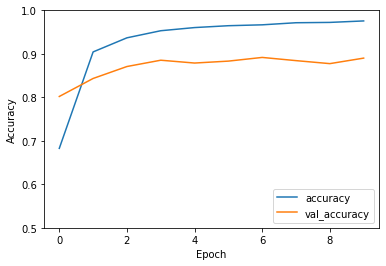

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(blured_test,  y_test, verbose=2)